In [125]:
import os
from matplotlib import ticker
import streamlit as st
import pandas as pd
import joblib
from prophet import Prophet
from ta.volatility import BollingerBands
from ta.trend import MACD, EMAIndicator, SMAIndicator
from ta.momentum import RSIIndicator
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from vnstock import listing_companies, stock_historical_data
from utils import *
from LSTM1 import LSTM1
from sklearn.model_selection import TimeSeriesSplit

In [102]:
data = stock_historical_data(symbol='A32', start_date='2019-04-10', end_date='2024-08-09', resolution="1D", type="stock", beautify=True, decor=True, source='DNSE')


In [103]:
data.reset_index()

,Time,Open,High,Low,Close,Volume,Ticker
0,2019-04-10,15570,15570,15570,15570,0,A32
1,2019-04-11,15570,15570,15570,15570,0,A32
2,2019-04-12,15570,15570,15570,15570,45,A32
3,2019-04-16,15570,15570,15570,15570,0,A32
4,2019-04-17,15570,15570,15570,15570,0,A32
...,...,...,...,...,...,...,...
866,2024-07-30,31800,31800,31800,31800,300,A32
867,2024-07-31,31800,31800,31530,31800,300,A32
868,2024-08-01,31890,31890,31890,31890,400,A32
869,2024-08-02,36620,36620,36620,36620,100,A32


In [104]:
data = data.rename_axis('Time').reset_index()

In [105]:
df = data[['Time','Close']]

rename_dict = {
    "Time": "ds",
    "Close": "y"
}
db = df.rename(columns=rename_dict)

In [136]:
x_train, x_test= train_test_split(db,shuffle = False, test_size = .02)

In [146]:
len(db)

871

In [130]:
x_test

,ds,y
653,2022-03-24,26010
654,2022-03-25,25200
655,2022-03-28,25650
656,2022-03-29,24000
657,2022-03-30,25270
...,...,...
866,2024-07-30,31800
867,2024-07-31,31800
868,2024-08-01,31890
869,2024-08-02,36620


In [139]:
model= Prophet()
model.fit(x_train)

00:00:39 - cmdstanpy - INFO - Chain [1] start processing
00:00:39 - cmdstanpy - INFO - Chain [1] done processing


In [162]:
x_test['y'].array

<PandasArray>
[32710, 32439, 32710, 31800, 32619, 31890, 35350, 31800, 31800, 36440, 32080,
 31800, 31890, 31800, 31800, 31890, 36620, 33440]
Length: 18, dtype: int32

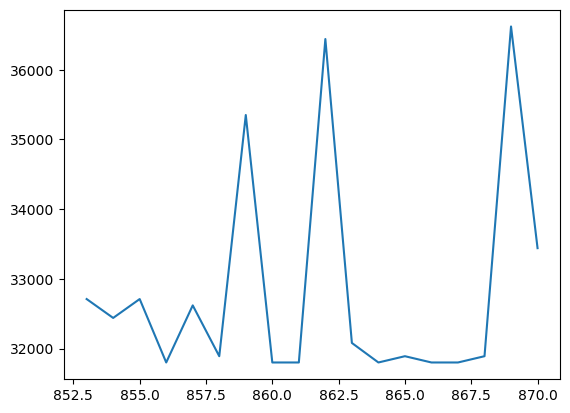

In [160]:
import matplotlib.pyplot as plt
plt.plot(x_test['y'])

In [147]:
future = model.make_future_dataframe(periods=(5+len(x_test)))
future

,ds
0,2019-04-10
1,2019-04-11
2,2019-04-12
3,2019-04-16
4,2019-04-17
...,...
871,2024-07-24
872,2024-07-25
873,2024-07-26
874,2024-07-27


In [157]:
forecast = model.predict(future)
forecast['yhat'].iloc[len(x_train):(len(x_train)+len(x_test))]
forecast['yhat'].iloc[(len(x_train)+len(x_test)):(len(db)+5)]


871    32430.893785
872    32652.825252
873    32472.638946
874    32347.769033
875    32383.345401
Name: yhat, dtype: float64

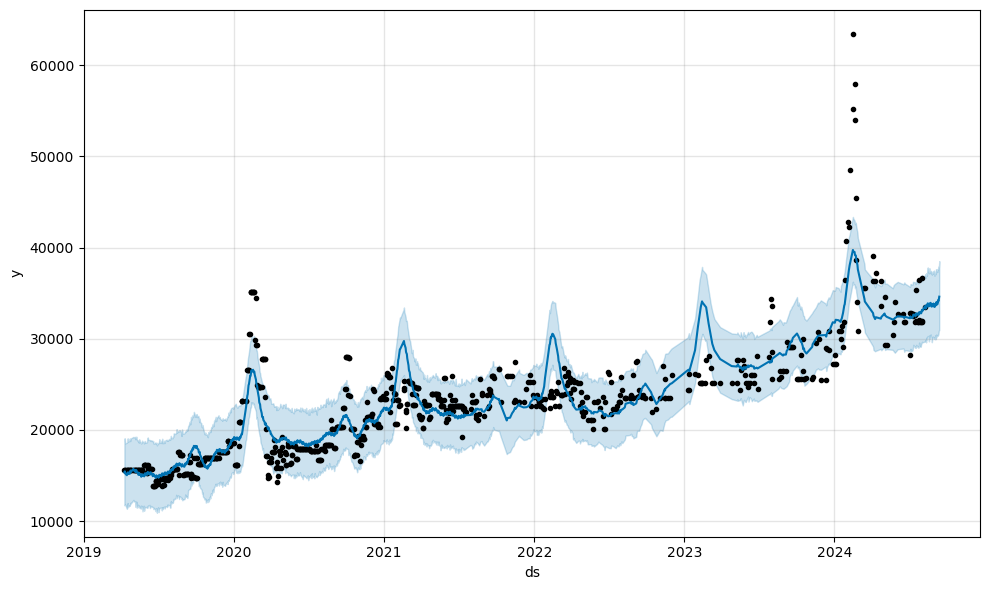

In [112]:
fig1 = model.plot(forecast)



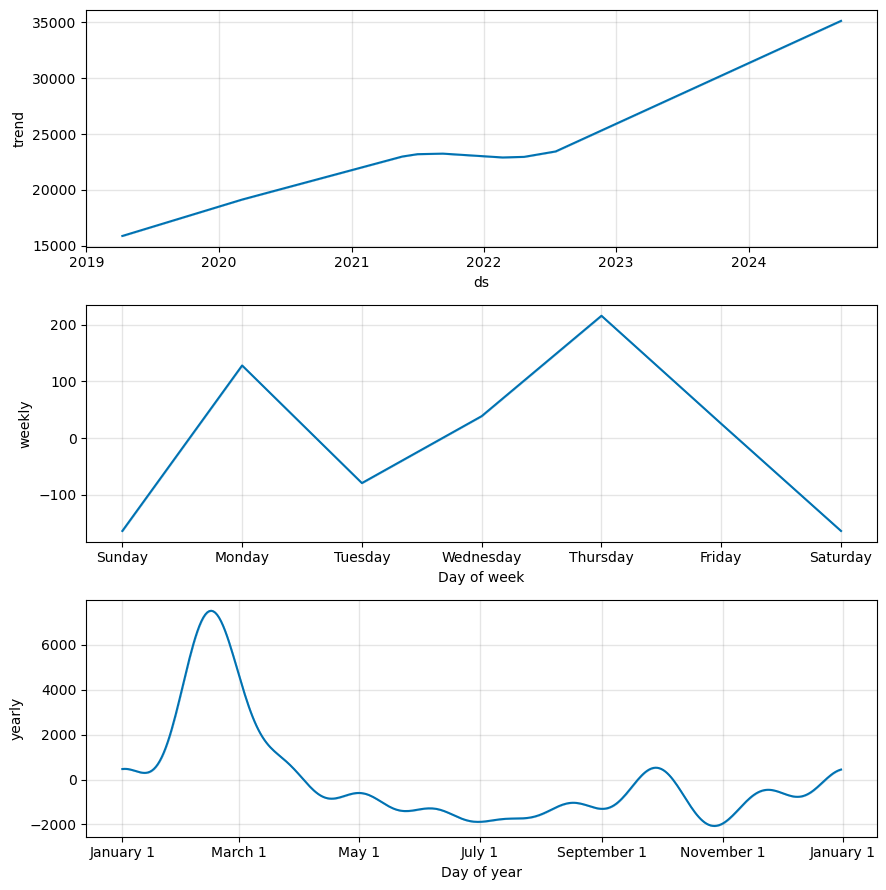

In [114]:
fig2 = model.plot_components(forecast)

